In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data from a CSV file and save it in a variable called df using pandas. It becomes a DataFrame.

In [46]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


We check general info about features, like their names and data types.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Features with type "object" are categorical, others are numeric. The target feature is "Personality". We save their names in different variables for later use.

In [48]:
categorical = ['Stage_fear', 'Drained_after_socializing']
numeric = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
target = 'Personality'

Now we look at the unique values of the categorical features.

In [49]:
print('Unique Values and Counts:\n')
for col in categorical+[target]:
    print(f'{df[col].value_counts()}\n')

Unique Values and Counts:

Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64

Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64



We see all are binary, so we change them to 1 and 0 for later analysis.

In [50]:
df.loc[
    df.Stage_fear=='Yes',
    'Stage_fear'
] = 1
df.loc[
    df.Stage_fear=='No',
    'Stage_fear'
] = 0
df.loc[
    df.Drained_after_socializing == 'Yes',
    'Drained_after_socializing'
] = 1
df.loc[
    df.Drained_after_socializing == 'No',
    'Drained_after_socializing'
] = 0
df.loc[
    df.Personality == 'Extrovert',
    'Personality'
] = 1
df.loc[
    df.Personality == 'Introvert',
    'Personality'
] = 0


In [51]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


Now that we changed categorical features, let's fix missing values. First, we find out how many are missing.

In [52]:
df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

All features have missing values. Compared to total records, they are few. But for learning, we study them and then fill missing values with good guesses.
My plan for categorical features:

1. Plot numeric features by categorical feature.
2. Find a numeric feature that best separates categorical feature.
3. Use its threshold to fill missing values in the categorical feature.

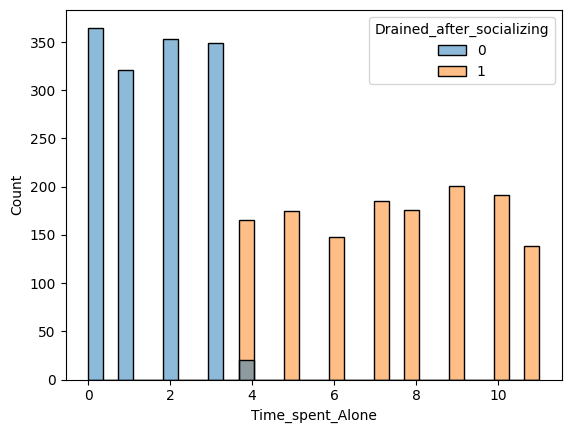

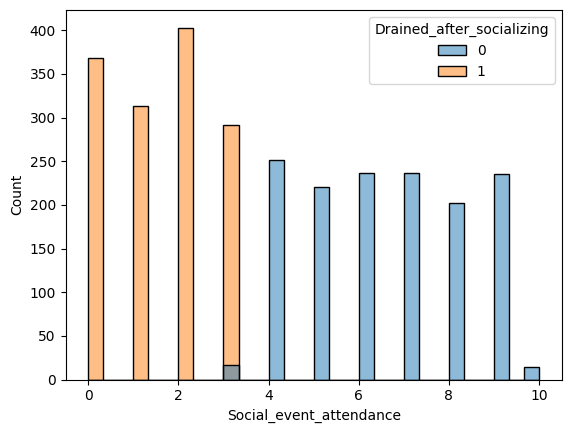

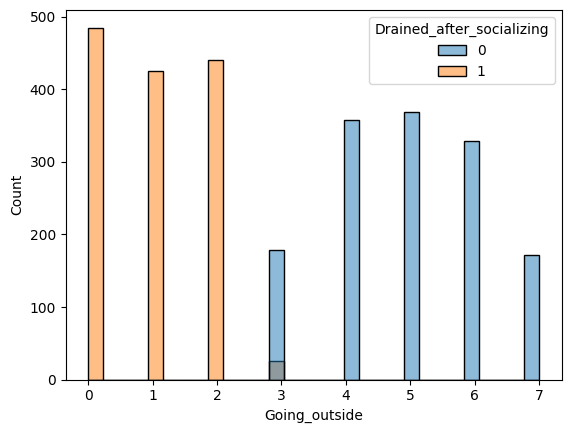

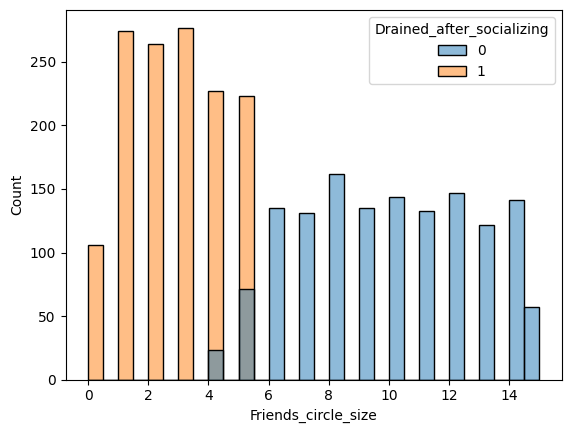

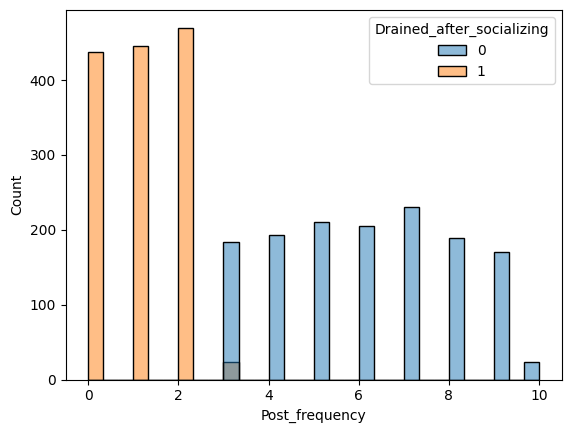

In [53]:
for col in numeric:
    sns.histplot(x=col, hue='Drained_after_socializing', data=df, bins=30)
    plt.show()

We can easily fill missing values of Drained_after_socializing using Going_outside:
If Going_outside ≥ 3, then Drained_after_socializing = 0.

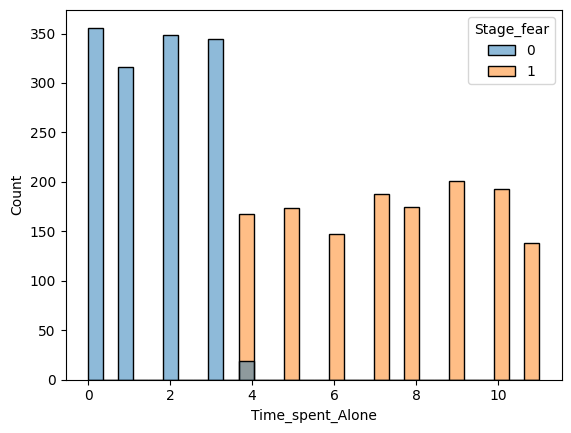

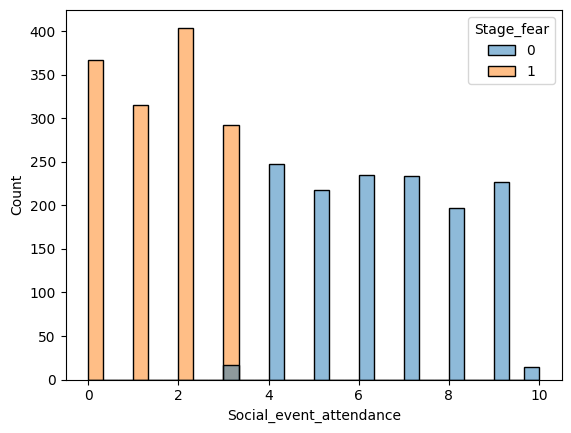

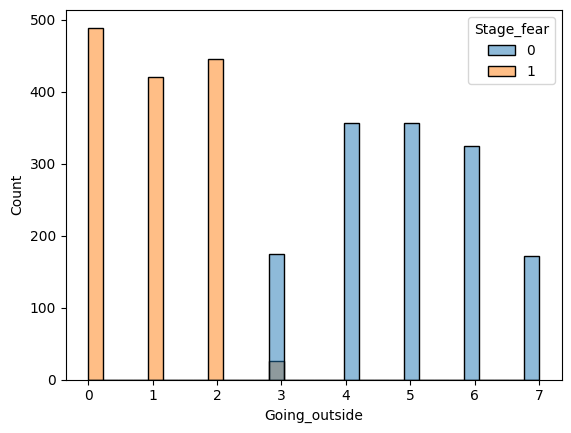

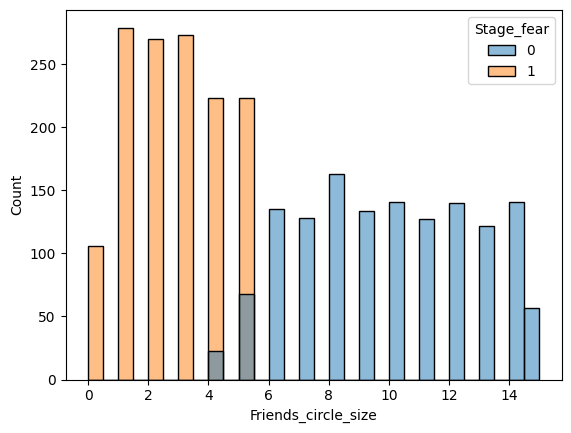

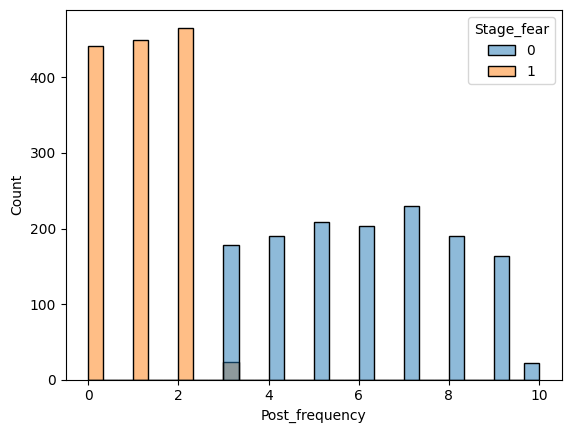

In [54]:
for col in numeric:
    sns.histplot(x=col, hue='Stage_fear', data=df, bins=30)
    plt.show()

We can easily fill missing values of Stage_fear using Going_outside:
If Going_outside ≥ 3, then Stage_fear = 0.

In [65]:
df.loc[
    (df['Stage_fear'].isna()) & (df['Going_outside'] < 3),
    'Stage_fear'
] = 1

In [66]:
df.loc[
    (df['Stage_fear'].isna()) & (df['Going_outside'] >= 3),
    'Stage_fear'
] = 0

In [67]:
df.loc[
    (df['Drained_after_socializing'].isna()) & (df['Going_outside'] < 3),
    'Drained_after_socializing'
] = 1

In [68]:
df.loc[
    (df['Drained_after_socializing'].isna()) & (df['Going_outside'] >= 3),
    'Drained_after_socializing'
] = 0

We will fill missing numeric values with the feature’s mean.

In [69]:
for col in numeric:
    df.loc[
        df[col].isna(),
        col
    ] = df[col].mean()

In [70]:
df.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


As you can see, all missing values are now filled.
Now, let's change the data types of features after all changes to the DataFrame.


In [72]:
df['Stage_fear'] = df['Stage_fear'].astype(int)
df['Drained_after_socializing'] = df['Drained_after_socializing'].astype(int)
df['Personality'] = df['Personality'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   int64  
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   int64  
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 181.4 KB


Now we check data distribution to understand it better. We make two functions to show central tendency and variability.We also draw histograms for the features.

In [73]:
def central_tendency(col: pd.DataFrame, name: str) -> None:
    mean = col.mean()
    median = col.median()
    print(f'Mean, Median of {name} = {mean},{median}')

def variability(col: pd.DataFrame, name: str) -> None:
    variance = col.var()
    std = col.std()
    print(f'Variance, Std of {name} = {variance},{std}')

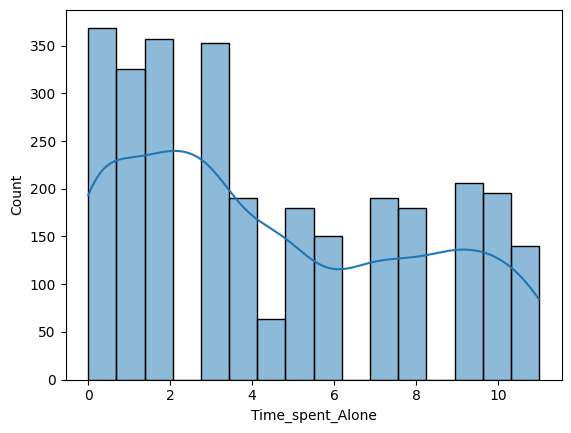

Mean, Median of Time_spent_Alone = 4.50581600281988,4.0


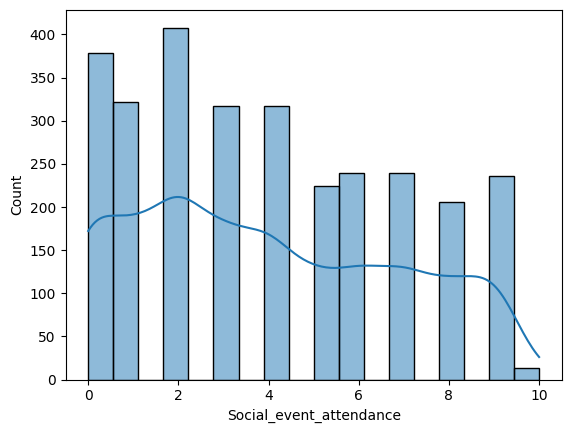

Mean, Median of Social_event_attendance = 3.9633544749823817,3.963354474982382


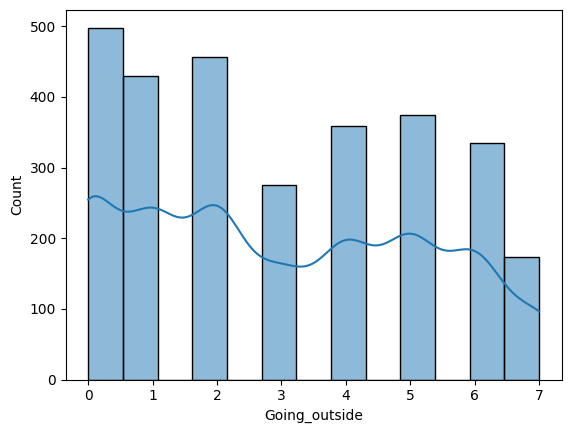

Mean, Median of Going_outside = 3.0,3.0


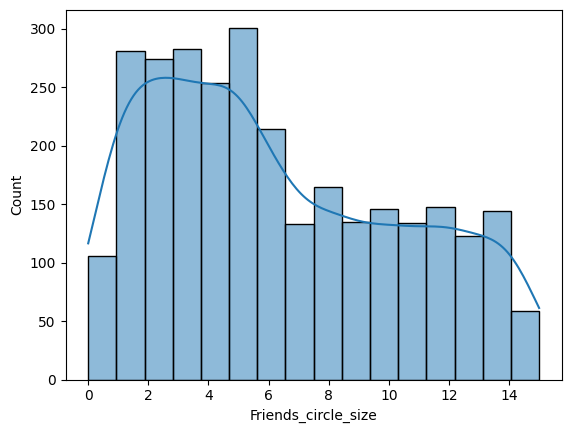

Mean, Median of Friends_circle_size = 6.268862911795961,5.0


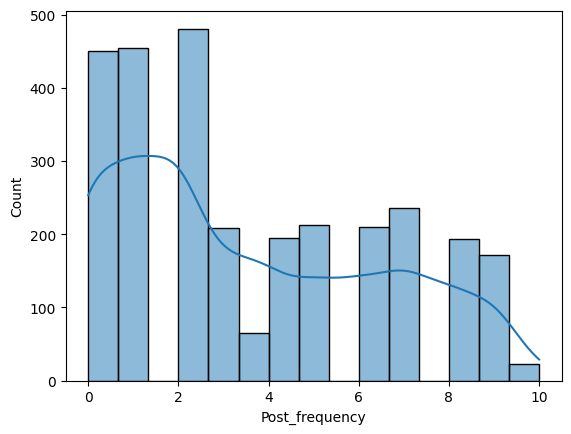

Mean, Median of Post_frequency = 3.564726631393298,3.0


In [74]:
for col in numeric:
    sns.histplot(df[col], kde=True)
    plt.show()
    central_tendency(df[col], col)

From histograms, we see no outliers. But to be sure, we create a function to find points outside the IQR.

In [75]:
def iqr_outlier(col: pd.Series, name: str) -> pd.Series:
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier = col[(col<lower_bound) | (col>upper_bound)]
    return outlier

In [76]:
for col in numeric:
    print(iqr_outlier(df[col], ''))

Series([], Name: Time_spent_Alone, dtype: float64)
Series([], Name: Social_event_attendance, dtype: float64)
Series([], Name: Going_outside, dtype: float64)
Series([], Name: Friends_circle_size, dtype: float64)
Series([], Name: Post_frequency, dtype: float64)


Our function agrees with this, so now our data is ready for machine learning.I put all the functions I need into one cell to keep them in one place.


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Let's separate features from the target, then split data into train, validation, and test sets.

In [78]:
X = df.drop(target, axis=1)
y = df[target]

In [79]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0


In [80]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2895    1
2896    1
2897    0
2898    0
2899    1
Name: Personality, Length: 2900, dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Now we use SVM to build a classifier to predict personality type from features.
Here’s what this code does:
    - It prepares to scale only the numeric features using a scaler.

    - Then, it builds a model pipeline that first scales data, then runs the SVM classifier.

    - It sets up different values for SVM settings like penalty, kernel type, and gamma to try during tuning.

    - The training and validation data are combined together to use in training.

    - A special split method is made to tell the model which part is training and which is validation.

    - Then, it searches for the best SVM settings using this split and trains the model.

    - it predicts the target on the test data, and prints results to show how well the model works.
    
    - Finally it Plot ROC plot 

Test Confusion Matrix:
[[261  17]
 [ 24 278]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



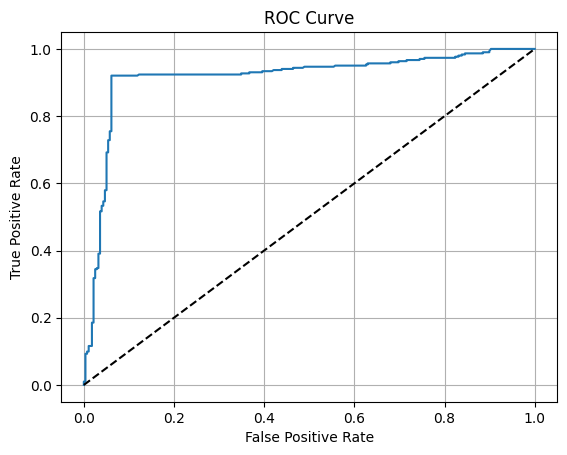

In [82]:
svc_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric)],
        remainder='passthrough'
    )

clf = Pipeline([
    ('preprocessor', svc_preprocessor),
    ('svc', SVC(probability=True))
])

svc_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

X_combined = pd.concat([X_train, X_val], ignore_index=True)
y_combined = pd.concat([y_train, y_val], ignore_index=True)

split_index = [-1] * len(X_train) + [0] * len(X_val)
ps = PredefinedSplit(test_fold=split_index)

svc_grid = GridSearchCV(clf, svc_param_grid, cv=ps, refit=True)
svc_grid.fit(X_combined, y_combined)

y_svc_test_pred = svc_grid.predict(X_test)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_svc_test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_svc_test_pred))

y_test_proba = svc_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

The model got 261 right for class 0 and 278 right for class 1.

It made 17 mistakes by saying class 0 but it was class 1.

It made 24 mistakes by saying class 1 but it was class 0.

The classification report:

Precision means when model says a class, how often it is right. It’s about 0.92 for class 0 and 0.94 for class 1.

Recall means how many of the real class it finds. It’s 0.94 for class 0 and 0.92 for class 1.

F1-score is mix of precision and recall, about 0.93 for both classes.

Accuracy means overall correct predictions, 93% here.

So, the model works well and predicts both classes almost equally good.

For implementing Decision Tree first this code joins the training and validation features into one big set. It does the same for the labels.

Then, it creates a list to tell which data is training (marked with -1) and which is validation (marked with 0).

It uses this list to make a special way to split data for cross-validation.

Next, it sets different settings to try for the decision tree, like how deep the tree can be, and how many samples are needed to split or be a leaf.

Then, it makes a grid search tool that tests all these settings using the special split method.

The grid search trains the decision tree on the combined data.

After training, it uses the best model to predict on the test data.

Finally, it prints results that show how well the model worked using confusion matrix and classification report.

Test Confusion Matrix:
[[261  17]
 [ 24 278]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



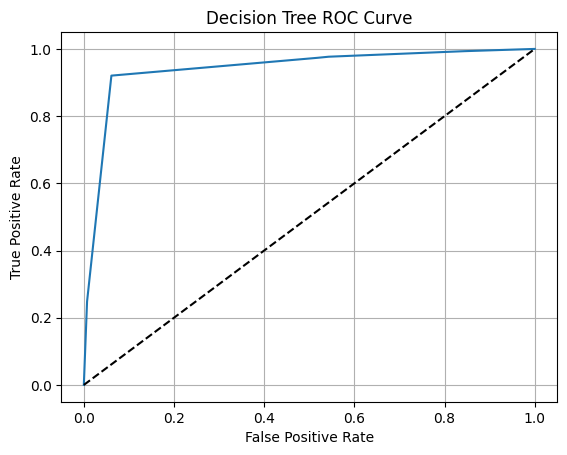

In [83]:
X_combined = pd.concat([X_train, X_val], ignore_index=True)
y_combined = pd.concat([y_train, y_val], ignore_index=True)

split_index = [-1] * len(X_train) + [0] * len(X_val)
ps = PredefinedSplit(test_fold=split_index)

tree_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tree_param_grid,
    cv=ps,
    refit=True,
    n_jobs=-1
)

tree_grid.fit(X_combined, y_combined)

y_tree_pred = tree_grid.predict(X_test)

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_tree_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_tree_pred))

y_tree_proba = tree_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_tree_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.grid(True)
plt.show()

result is same like SVM

Now we will group the data into clusters.

First, we use the Elbow method with a function called optimize k. We plot the graph to find the best k value.

In [84]:
def optimize_k(X_data, max_k: int) -> None:
    scalar = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric)],
        remainder='passthrough'
    )
    X_scaled = scalar.fit_transform(X_data)
    inertia = []
    for k in range(1, max_k):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertia.append(km.inertia_)

    plt.plot(range(1, max_k), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()

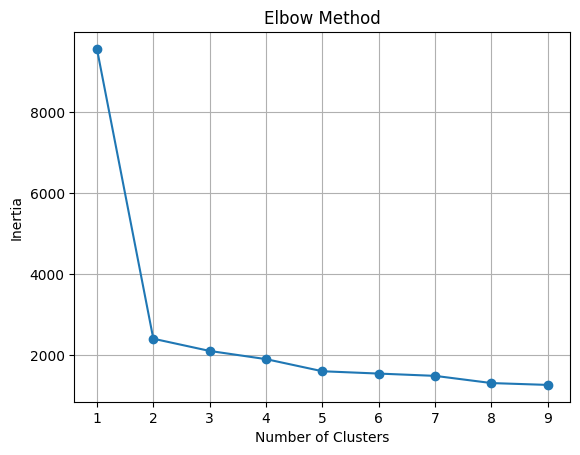

In [85]:
optimize_k(X_train, 10)

Based on the plot, k=2 looks like a good choice. To be sure, we check how good the clustering is for k=2 and k=3 using the Silhouette method.

[2, 3, 4, 5, 6, 7, 8, 9]


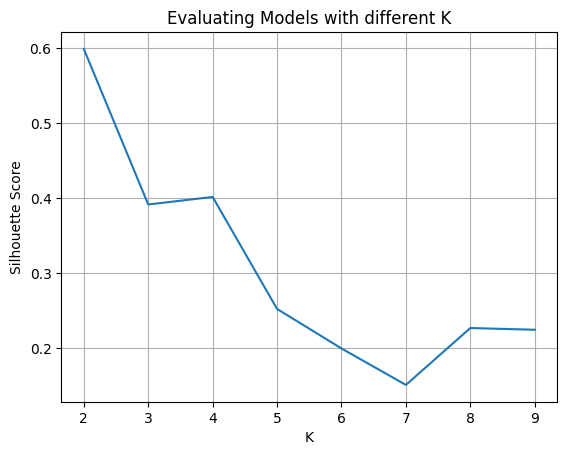

In [86]:
def kmean_cluster(k: int, X_train: pd.DataFrame, X_test: pd.DataFrame):
    scalar = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric)],
        remainder='passthrough'
    )
    kmeans_pipeline = Pipeline([
        ('scalar', scalar),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])

    kmeans_pipeline.fit(X_train)
    clusters = kmeans_pipeline.predict(X_test)
    score = silhouette_score(X_test, clusters)
    return kmeans_pipeline, scalar, score

scores = []
k_range = list(range(2,10))
print(k_range)
for k in k_range:
    _,_, score = kmean_cluster(k, X_train, X_test)
    scores.append(score)
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Evaluating Models with different K')
plt.grid(True)
plt.show()

In [87]:
# So we store k=2 model with score 0.6774 that is close to 1
kmean_model, kscalar,_ = kmean_cluster(2, X_train, X_test)
clusters = kmean_model.predict(X_test)

In [92]:
clusters[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [97]:
cluster1 = X_test.iloc[[0,2]]
cluster2 = X_test.iloc[[1,7]]

In [98]:
cluster1

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
141,10.0,1,3.0,3.0,1,5.0,3.0
485,5.0,1,0.0,0.0,1,0.0,2.0


In [99]:
cluster2

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1557,4.505816,0,3.963354,5.0,0,14.0,5.0
2711,4.505816,0,4.000000,6.0,0,12.0,3.0


It's clear that cluster 1 is related to extrovert people who go outside a lot and don't have stage fear and cluster 2 are introvert people with opposite personalities

In the last part of the project, we use PCA to find the most important components. Then, we plot the data based on the predicted classes.

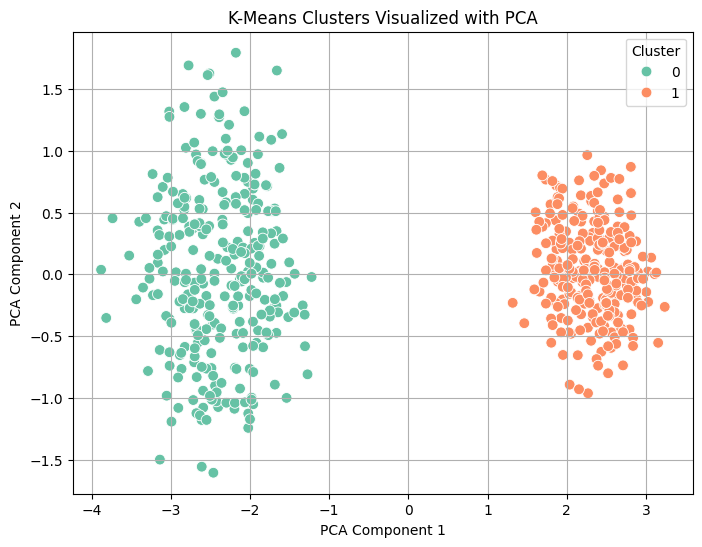

In [41]:
scalar = StandardScaler().fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_test_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=60)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Note: For all models, we train using the train set. If there's hyperparameter tuning, we use the validation set. For final evaluation, we use the test set.